#Fire up graphlab create

In [1]:
import turicreate as tc

#Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [2]:
sales = tc.SFrame('datasets/home_data.gl/')

In [3]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


#Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.
(esto nos da visuzlizacion)

In [10]:
sales.show() #show es una vizualizacion
#comparamos x vs y para graficar
#este es el scatter plot

Materializing SFrame...

Done.

Warning: Skipping column 'date'. Unable to show columns of type 'datetime'; only [int, float, str] can be shown.

Further warnings of unsupported type will be suppressed.

#Create a simple regression model of sqft_living to price

Split data into training and testing.  
We use seed=0 so that everyone running this notebook gets the same results.  In practice, you may set a random seed (or let GraphLab Create pick a random seed for you).  

In [11]:
train_data,test_data = sales.random_split(.8,seed=0)  ##se selecciona el porcentaje de entrenamiento
##como se selecciona aleatoriamente se pone una semilla

##Build the regression model using only sqft_living as a feature

In [12]:
sqft_model = tc.linear_regression.create(train_data, target='price', features=['sqft_living']) 
##square fit model=
##ajusta el modelo, y se le dan los datos de entrenamiento, target es lo que queremos predecir,
##en features le decimos que variable queremos que sea la independiente
##pueden ser varias

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16511

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 1.047516     | 4346813.078279     | 2897710.291300       | 263655.897632 | 249093.945269   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

#Evaluate the simple model

In [13]:
print test_data['price'].mean() ##queremos entender el test data
##en este caso nos dice el costo promedio (caro)

543054.042563


In [14]:
print sqft_model.evaluate(test_data) ##rmse root square error

{'max_error': 4141370.0040524243, 'rmse': 255192.6545095778}


RMSE of about \$255,192! ##como que no nos están gustando las predicciones

#Let's show what our predictions look like

Matplotlib is a Python plotting library that is also useful for plotting.  You can install it with:

'pip install matplotlib'



In [15]:
import matplotlib.pyplot as plt  ##hay mas herramientas para plotear como esta por ejemplo
%matplotlib inline

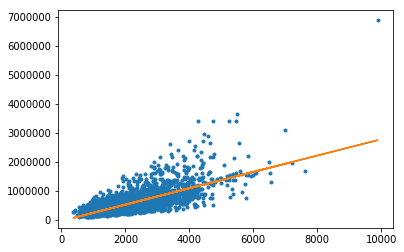

In [16]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',  ##eje x, eje y, el punto es imp
        test_data['sqft_living'],sqft_model.predict(test_data),'-') ##el punto como que te permite
##encimar el scatter y la regression
##por eso en el x ponemos los datos, y en el y nuestra prediccion, el dash '-' poner

Above:  blue dots are original data, green line is the prediction from the simple regression.

Below: we can view the learned regression coefficients. 

In [18]:
sqft_model.coefficients
##la funcion get nos trae los elementos del modelo en este caso los coeficientes
##lo que nos dice el w1 es como que el valor promedio por una unidad
## es decir se tiene una inclinacion de 280 por pie cuadrado

name,index,value,stderr
(intercept),None,-47350.5577112,5061.13847409
sqft_living,None,282.202280451,2.22467469582


#Explore other features in the data

To build a more elaborate model, we will explore using more features.

In [19]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
##queremos explorar las demás variables o features 

In [20]:
sales[my_features].show() #la funcion show es de graphlabe create
#nos da una visualizacion muy cool de los datos asi como caracteristicas
#agarramos los features que mencioné y los busco en sales, y los muestro

Materializing SFrame...

Done.

In [22]:
#sales.show(view='BoxWhisker Plot', x='zipcode', y='price') no special views yet
##ahora queremos hacer oro grafico, donde relaciones a las variables (zipcode y price)
##claro lo que queremos ver es la relacion precio ubicacion

Pull the bar at the bottom to view more of the data.  

98039 is the most expensive zip code.

In [23]:
sales_zipcode=sales[sales['zipcode']=='98039']

In [24]:
sales_zipcode['price'].mean()

2160606.6000000006

In [25]:
sales_sqft_range=sales[(sales['sqft_living'] > 2000) & (sales['sqft_living'] < 4000)]

In [26]:
len(sales_sqft_range)

9111

In [27]:
len(sales) ##42.15%

21613

##Now we'll see advanced features

In [28]:
advanced_features = ['bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'floors', 'zipcode','condition',
                    'grade','waterfront','view','sqft_above','sqft_basement','yr_built','yr_renovated',
                    'lat','long','sqft_living15','sqft_lot15']

#Build a regression model with more features

In [29]:
my_features_model = tc.linear_regression.create(train_data,target='price',features=my_features)
##ahora que vimos que algunas variables pueden ser importantes 
##ahora ajustamos un modelo con mas variables
##fijenese que lo hacemos con los datos de entrenamiento otra vez

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16542

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.033526     | 3752096.424062     | 1237318.047129       | 182752.667970 | 165276.514732   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [30]:
##Entrenamos un modelo con advanced features
advanced_features_model = tc.linear_regression.create(train_data,target='price',features=advanced_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16509

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 127

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.054223     | 3445069.679956     | 1563828.764846       | 155086.192414 | 152893.927970   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [31]:
print my_features ##ahora tenemos dos modelos
print advanced_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'condition', 'grade', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


##Comparing the results of the simple model with adding more features
##tambien con los advenced features

In [32]:
print sqft_model.evaluate(test_data)
print my_features_model.evaluate(test_data)
print advanced_features_model.evaluate(test_data)

##evaluamos los dos modelos, claro con los datos de prueba (20%)
##en el primero hay más error

{'max_error': 4141370.0040524243, 'rmse': 255192.6545095778}
{'max_error': 3465864.841108311, 'rmse': 179356.90888725055}
{'max_error': 3570291.145986981, 'rmse': 157965.06737814087}


The RMSE goes down from \$255,170 to \$179,508 with more features.
ahora se reduce a \$157,027 aun más 
el error se reduce bastante agregando variables

In [33]:
178034.4726318883-157027.49102771605

21006.981604172237

In [34]:
179508-157027.49102771605 ## son como que las dos opciones de diferencia de errores

22480.508972283948

#Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [35]:
house1 = sales[sales['id']=='5309101200']    ##ya que estan los modelos entrenados 
##ya podemos predecir
##veamos propiamente un ejemplo tratando de ver el precio de una casa
##viene de nuestros datos

In [36]:
house1
##<img src="house-5309101200.jpg">  podemos meter imagenes de la casa

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="house-5309101200.jpg"> 

In [37]:
print house1['price'] ##imprime el precio de la casa en particular que tenemos
## es el precio real, lo queremos ver por que lo queremos comparar

[620000, ... ]


In [38]:
print sqft_model.predict(house1) ##bastante cerca!!

[629934.9153707905]


In [39]:
print my_features_model.predict(house1)  ##en este caso en particular la prediccion es mayor
##que en la prediccion con 1 sola variable
##en general mas features es mejor

[721846.5911518962]


In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature.  However, on average, the model with more features is better.

##Prediction for a second, fancier house

We will now examine the predictions for a fancier house.

In [40]:
house2 = sales[sales['id']=='1925069082']
##veamos otro caso

In [41]:
house2 ##es una casa muy grande y costosa
##en la imagen se ve que esta en frente al lago, eso explica por que tan cara

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000 |    5     |    4.25   |     4640    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  22703   |   2    |     1      |  4   |     5     |   8   |    2860    |      1780     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1952   |      0       |  98052  | 47.63925783 | -122.09722322 |     3140.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="house-1925069082.jpg">

In [42]:
print sqft_model.predict(house2) ##otra vez predecimos el precio

[1262068.0235806701]


In [43]:
print my_features_model.predict(house2) 

[1446142.455323278]


In this case, the model with more features provides a better prediction.  This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house. 

##Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [44]:
bill_gates = {'bedrooms':[8],   ##ahora hagamos una casa super chida
              'bathrooms':[25], ##observar que lo cool es que podemos agregar datos nuevos
              'sqft_living':[50000], ##con el modelo ya entrenado debe funcionar
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="house-bill-gates.jpg">

In [45]:
print my_features_model.predict(tc.SFrame(bill_gates)) ##predice el precio de la casa de 
##bill gates teniendo las variables necesarias
##conclusion abajo

[13769109.106352653]


The model predicts a price of over $13M for this house! But we expect the house to cost much more.  (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)

#la tarea del modulo

Compute the RMSE (root mean squared error) on the test_data for the model using just my_features, and for the one using advanced_features.
Note 1: when doing the train-test split, make sure you use seed=0, so you get the same training and test sets, and thus results, as we do.

Note 2: in the module we discussed residual sum of squares (RSS) as an error metric for regression, but Turicreate Create uses root mean squared error (RMSE). These are two common measures of error regression, and RMSE is simply the square root of the RSS:


RMSE can be more intuitive, since its units are the same as that of the target column in the data, in our case the unit is dollars ($).

What is the difference in RMSE between the model trained with my_features and the one trained with advanced_features? Save this result to answer the quiz at the end